In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [135]:
df_test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [136]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [137]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [138]:
pd.set_option('display.max_rows', None)

In [139]:
missing_values = df_test.isnull().sum()
missing_values = missing_values.loc[missing_values > 0]
missing_values.sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [140]:
null_columns_count = df.isnull().sum()[df.isnull().sum() > 0]
total_rows_of_null_columns = df.isnull().count()[df.isnull().sum() > 0]
null_percentage = (null_columns_count/total_rows_of_null_columns)*float(100)
missing_data = pd.concat([null_columns_count, null_percentage], axis=1, keys=['Total', 'Percentage'])
null_percentage.sort_values(ascending = False)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [141]:
null_columns_count = df_test.isnull().sum()[df_test.isnull().sum() > 0]
total_rows_of_null_columns = df_test.isnull().count()[df_test.isnull().sum() > 0]
null_percentage = (null_columns_count/total_rows_of_null_columns)*float(100)
missing_data = pd.concat([null_columns_count, null_percentage], axis=1, keys=['Total', 'Percentage'])
null_percentage.sort_values(ascending = False)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64

In [142]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [143]:
#Como são poucos valores faltantes e os valores variam entre 60 e 80 eu preferi jogar uma média neles do que perder esses dados. 
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df_test['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [144]:
df_test = df_test.dropna(subset=['SaleType', 'MSZoning'])

In [146]:
null_columns_count = df.isnull().sum()[df.isnull().sum() > 0]
total_rows_of_null_columns = df.isnull().count()[df.isnull().sum() > 0]
null_percentage = (null_columns_count/total_rows_of_null_columns)*float(100)
missing_data = pd.concat([null_columns_count, null_percentage], axis=1, keys=['Total', 'Percentage'])
null_percentage.sort_values(ascending = False)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [147]:
null_columns_count = df_test.isnull().sum()[df_test.isnull().sum() > 0]
total_rows_of_null_columns = df_test.isnull().count()[df_test.isnull().sum() > 0]
null_percentage = (null_columns_count/total_rows_of_null_columns)*float(100)
missing_data = pd.concat([null_columns_count, null_percentage], axis=1, keys=['Total', 'Percentage'])
null_percentage.sort_values(ascending = False)


PoolQC          99.793673
MiscFeature     96.492435
Alley           92.640990
Fence           80.055021
MasVnrType      61.210454
FireplaceQu     49.931224
GarageCond       5.364512
GarageQual       5.364512
GarageFinish     5.364512
GarageYrBlt      5.364512
GarageType       5.226960
BsmtCond         2.888583
BsmtQual         2.819807
BsmtExposure     2.819807
BsmtFinType1     2.682256
BsmtFinType2     2.682256
MasVnrArea       1.031637
BsmtHalfBath     0.137552
BsmtFullBath     0.137552
Functional       0.068776
KitchenQual      0.068776
Utilities        0.068776
TotalBsmtSF      0.068776
GarageCars       0.068776
GarageArea       0.068776
BsmtUnfSF        0.068776
BsmtFinSF2       0.068776
Exterior1st      0.068776
BsmtFinSF1       0.068776
Exterior2nd      0.068776
dtype: float64

In [148]:
#Eu geralmente só uso o isnull.sum para verificar os dados faltantes, e a primeira vez que eu trabalhei com esses dados cheguei ao final cheio de Nan, porque o max row não chegava a exibir todos. Então dessa segunda vez eu já mudei a abordagem de visualização e tratamento dos dados

In [149]:
df1 = df.drop(['Alley','GarageYrBlt','PoolQC','Fence','MiscFeature','MasVnrType','FireplaceQu'],axis=1,inplace=True)

df_test1 = df_test.drop(['Alley','GarageYrBlt','PoolQC','Fence','MiscFeature','MasVnrType','FireplaceQu'],axis=1,inplace=True)


C:\Users\me_ad\AppData\Local\Temp\ipykernel_7252\3768179179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1 = df_test.drop(['Alley','GarageYrBlt','PoolQC','Fence','MiscFeature','MasVnrType','FireplaceQu'],axis=1,inplace=True)


In [150]:
null_columns_count = df_test.isnull().sum()[df_test.isnull().sum() > 0]
total_rows_of_null_columns = df_test.isnull().count()[df_test.isnull().sum() > 0]
null_percentage = (null_columns_count/total_rows_of_null_columns)*float(100)
missing_data = pd.concat([null_columns_count, null_percentage], axis=1, keys=['Total', 'Percentage'])
null_percentage.sort_values(ascending = False)

GarageCond      5.364512
GarageQual      5.364512
GarageFinish    5.364512
GarageType      5.226960
BsmtCond        2.888583
BsmtQual        2.819807
BsmtExposure    2.819807
BsmtFinType1    2.682256
BsmtFinType2    2.682256
MasVnrArea      1.031637
BsmtFullBath    0.137552
BsmtHalfBath    0.137552
Functional      0.068776
GarageArea      0.068776
GarageCars      0.068776
Utilities       0.068776
KitchenQual     0.068776
TotalBsmtSF     0.068776
Exterior1st     0.068776
BsmtFinSF2      0.068776
BsmtFinSF1      0.068776
Exterior2nd     0.068776
BsmtUnfSF       0.068776
dtype: float64

In [151]:
df.fillna(0, inplace=True)

In [152]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType','SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
         'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Heating','HeatingQC','CentralAir',
         'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [153]:
df = pd.get_dummies(df, columns=columns)

In [154]:
correlation = df.corr()

saleprice_corr = correlation['SalePrice']

low_corr_columns = saleprice_corr[abs(saleprice_corr) < 0.05].index
low_corr_columns = low_corr_columns.drop('Id')

df1 = df.drop(low_corr_columns, axis=1)

In [155]:
pd.reset_option('display.max_rows')

In [161]:
print(df1.shape)
print(df_test.shape)

(1460, 175)
(1454, 165)


In [157]:
df_test = pd.get_dummies(df_test, columns=columns)

In [160]:
df1_columns = df1.columns.tolist()

# lista das colunas em df_test que não estão em df1
drop_columns = [col for col in df_test.columns if col not in df1_columns]

# Removendo as colunas de df_test que não estão em df1
df_test = df_test.drop(drop_columns, axis=1)


In [163]:
null_columns_count = df_test.isnull().sum()[df_test.isnull().sum() > 0]
total_rows_of_null_columns = df_test.isnull().count()[df_test.isnull().sum() > 0]
null_percentage = (null_columns_count/total_rows_of_null_columns)*float(100)
missing_data = pd.concat([null_columns_count, null_percentage], axis=1, keys=['Total', 'Percentage'])
null_percentage.sort_values(ascending = False)

MasVnrArea      1.031637
BsmtFullBath    0.137552
BsmtFinSF1      0.068776
BsmtUnfSF       0.068776
TotalBsmtSF     0.068776
GarageCars      0.068776
GarageArea      0.068776
dtype: float64

In [168]:
colunas = ['MasVnrArea', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', 'GarageCars', 'GarageArea']

for col in colunas:
    df_test[col] = df_test[col].fillna(0)

In [169]:
null_columns_count = df_test.isnull().sum()[df_test.isnull().sum() > 0]
total_rows_of_null_columns = df_test.isnull().count()[df_test.isnull().sum() > 0]
null_percentage = (null_columns_count/total_rows_of_null_columns)*float(100)
missing_data = pd.concat([null_columns_count, null_percentage], axis=1, keys=['Total', 'Percentage'])
null_percentage.sort_values(ascending = False)

Series([], dtype: float64)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'TotRmsAbvGrd'

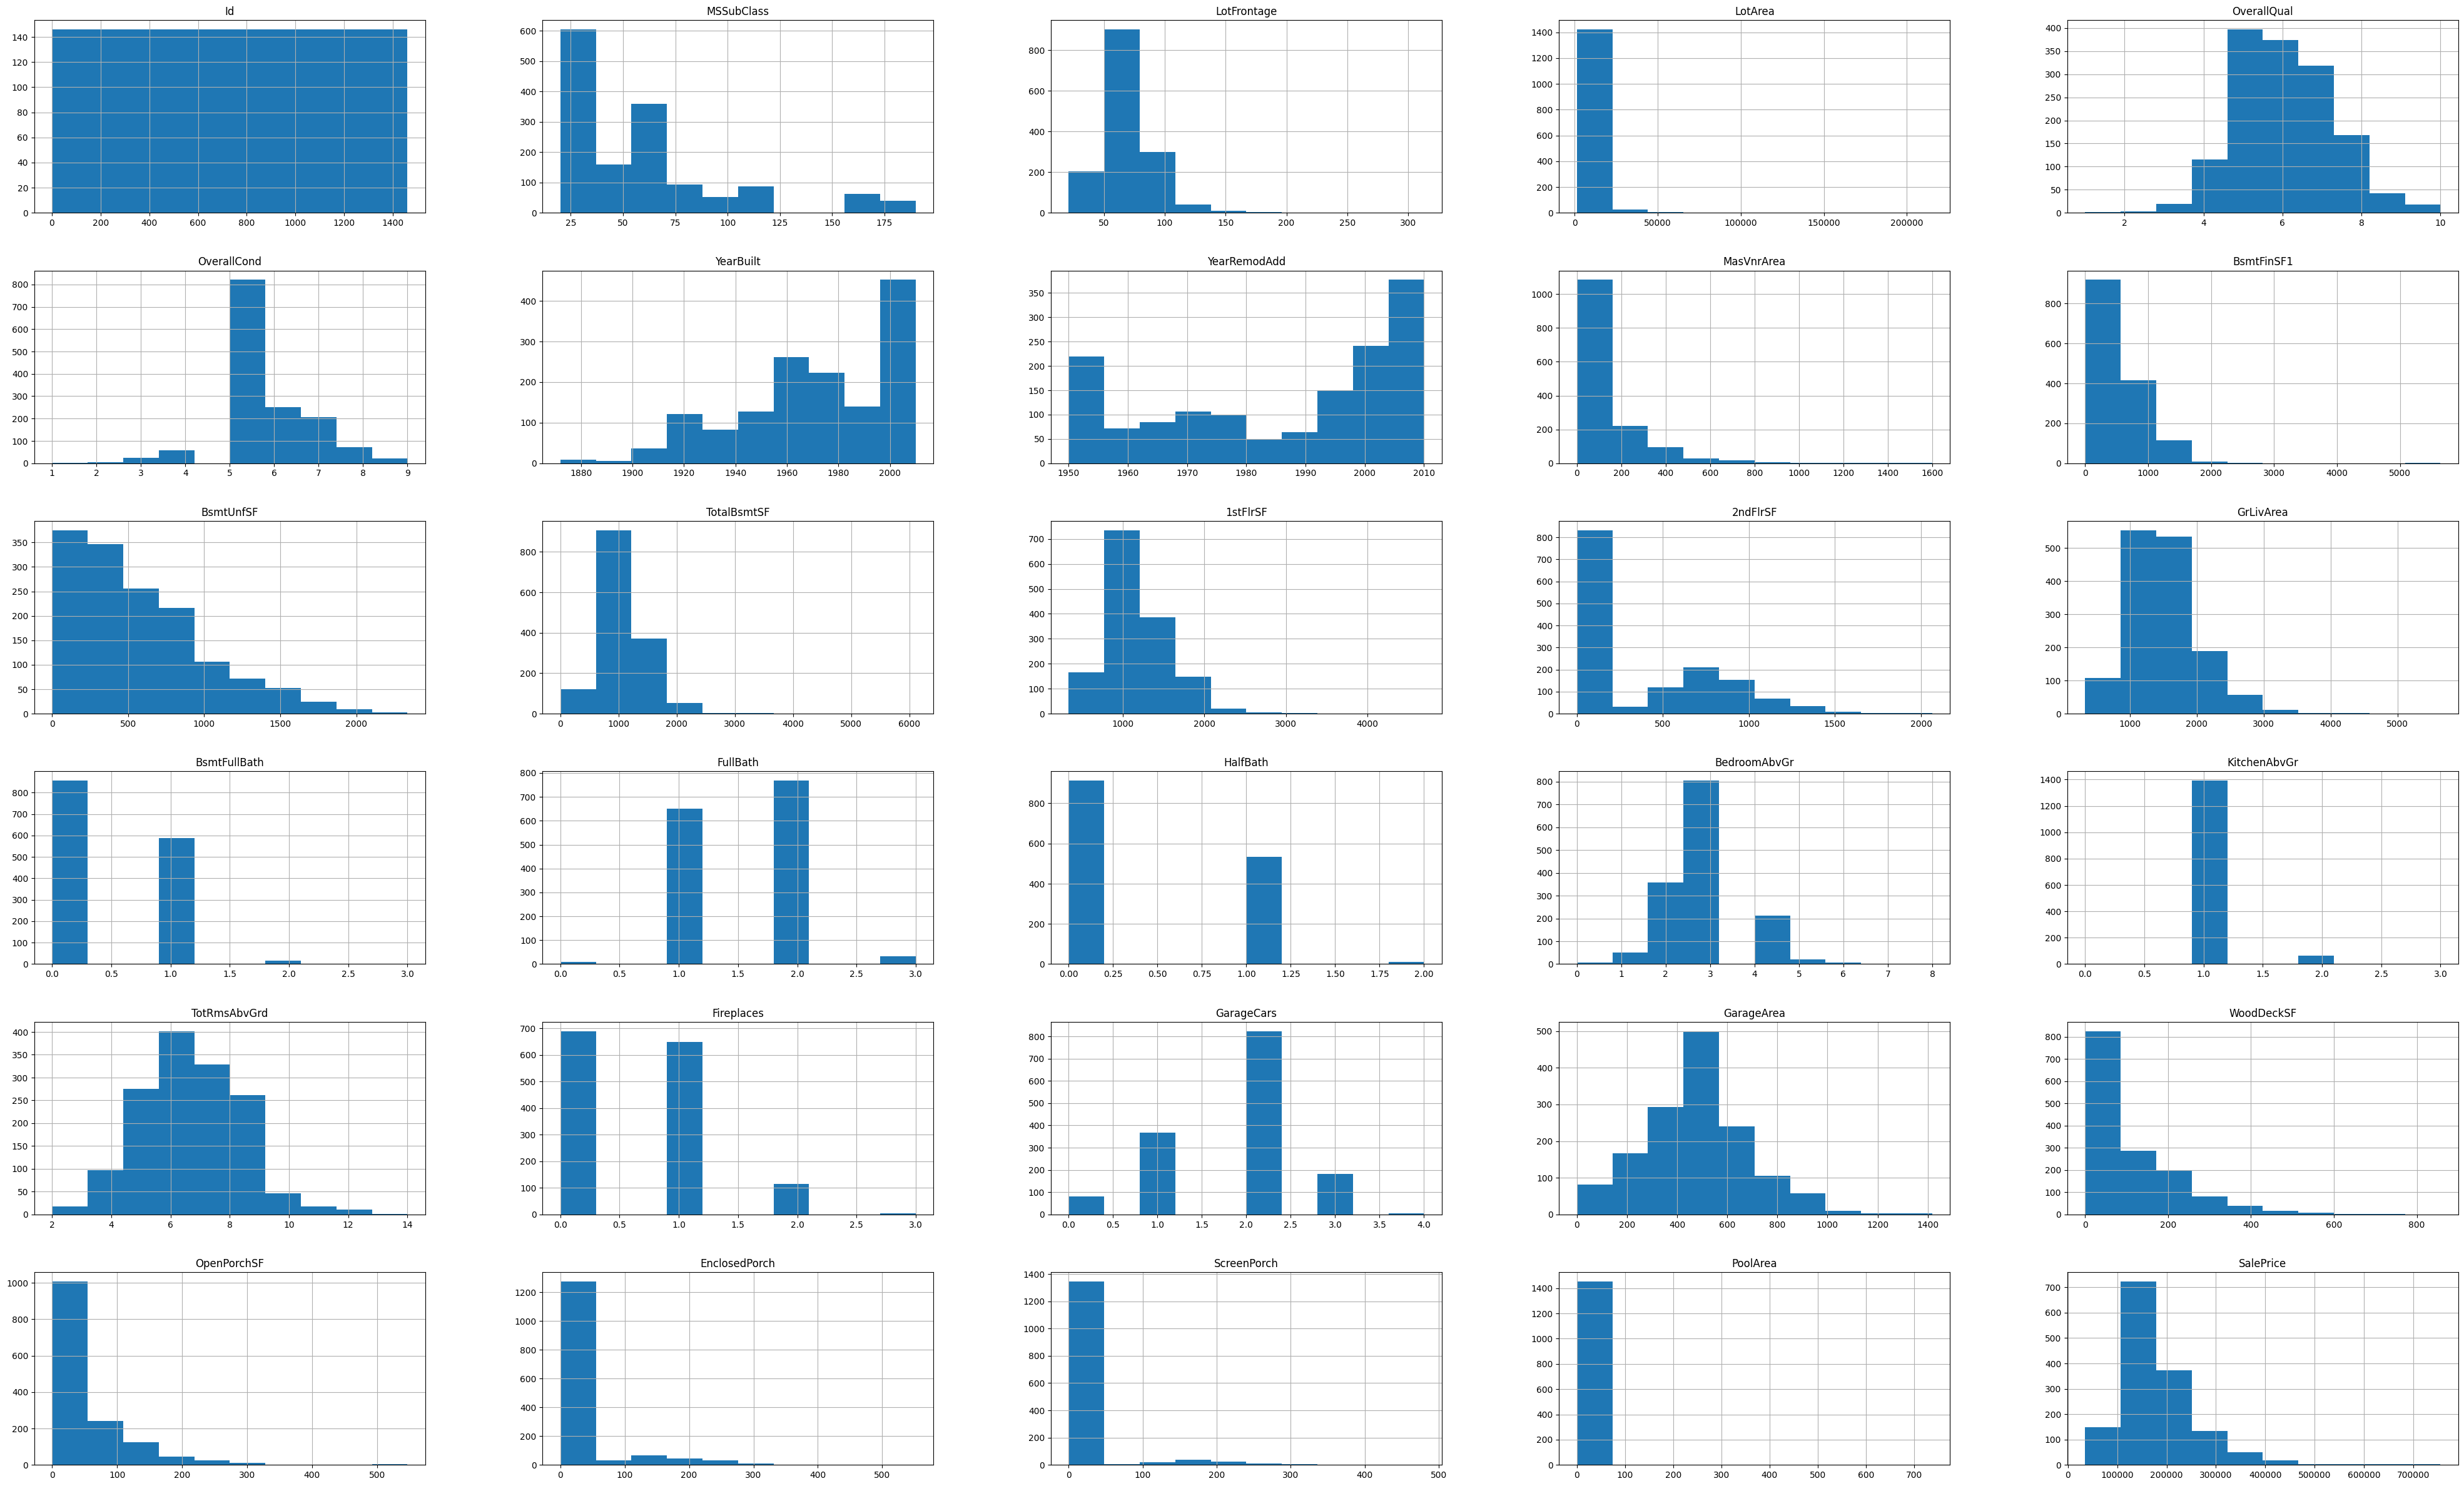

In [170]:
df1.hist(figsize=(50,30))

CRIANDO OS MODELOS

In [171]:
model = []
score = []

x_train, x_test, y_train, y_test = train_test_split(df1.drop(["SalePrice"],axis=1),df1["SalePrice"],test_size=0.2,random_state=0)

print("X Train Shape", x_train.shape)
print("Y Train Shape", y_train.shape)
print("X Test Shape", x_test.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (1168, 174)
Y Train Shape (1168,)
X Test Shape (292, 174)
Y Test Shape (292,)


In [ ]:
# Eu já vi alguns codigos que as pessoas colocam todos os modelos pra rodar dentro de um 'for' e quando você executa ele faz a simulação de todos os modelos, 
# mas eu particularmente não gosto dessa abordagem, prefiro roda-los separados e fazer alguma melhoria em um modelo especifico se for necessário

In [172]:
#Regressão linear
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_model_predict = linear_model.predict(x_test)
print("Score: ",r2_score(linear_model_predict,y_test))
model.append("Multi Linear Regression")
score.append(r2_score(linear_model_predict,y_test))

Score:  0.736057855579644


In [173]:
#Arvore de decisão
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
tree_reg_predict = tree_reg.predict(x_test)
print("Score: ",r2_score(tree_reg_predict,y_test))
model.append("Decision Tree Regression")
score.append(r2_score(tree_reg_predict,y_test))

Score:  0.7043386715168822


In [174]:
#Modelo lasso
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)
lasso_model_predict = lasso_model.predict(x_test)
print("Score: ",r2_score(lasso_model_predict,y_test))
model.append("Lasso Regression")
score.append(r2_score(lasso_model_predict,y_test))

Score:  0.7368912273792678


c:\Users\me_ad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.910e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


In [175]:
#Elastic Net
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train,y_train)
elasticnet_model_predict = elasticnet_model.predict(x_test)
print("Score: ",r2_score(elasticnet_model_predict,y_test))
model.append("Elastic Net Regression")
score.append(r2_score(elasticnet_model_predict,y_test))

Score:  0.6289498578575594


c:\Users\me_ad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.213e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


In [176]:
#Random Forest
reg = RandomForestRegressor(n_estimators=100, random_state = 42)
reg.fit(x_train,y_train)
reg_predict = reg.predict(x_test)
print("Score: ",r2_score(reg_predict,y_test))
model.append("Random Forest Regression")
score.append(r2_score(reg_predict,y_test))

Score:  0.7947949394568221


In [177]:
#Ada Boost
reg_ada = AdaBoostRegressor(random_state=0, n_estimators=5)
reg_ada.fit(x_train,y_train)
reg_ada_predict = reg_ada.predict(x_test)
print("Score: ",r2_score(reg_ada_predict,y_test))
model.append("Ada Boost Regression")
score.append(r2_score(reg_ada_predict,y_test))

Score:  0.5593918448555387


In [178]:
#Gradient boost
reg_gb = GradientBoostingRegressor(
    n_estimators = 51
)
reg_gb.fit(x_train,y_train)
reg_gb_predict = reg_gb.predict(x_test)
print("Score: ",r2_score(reg_gb_predict,y_test))
model.append("Gradient Boosting Regression")
score.append(r2_score(reg_gb_predict,y_test))

Score:  0.8450435908870081


In [179]:
#XGB
from xgboost import XGBRegressor

model_params = {}
reg_xgb = XGBRegressor(**model_params)
reg_xgb.fit(x_train,y_train)
reg_xgb_predict = reg_xgb.predict(x_test)
print("Score: ",r2_score(reg_xgb_predict,y_test))
model.append("XGBoost Regression")
score.append(r2_score(reg_xgb_predict,y_test))

Score:  0.8022331460220511


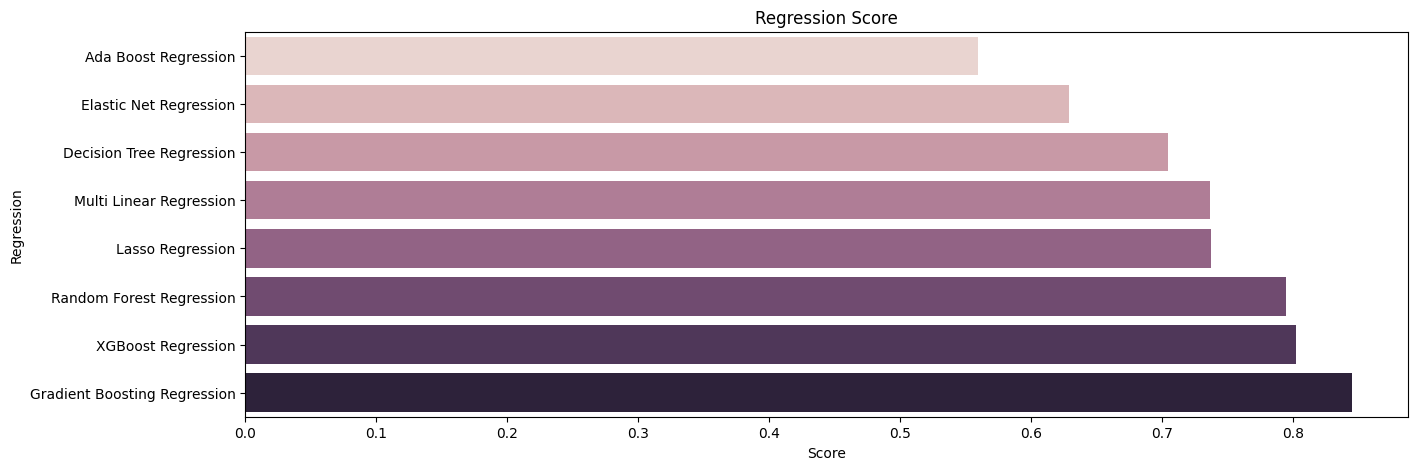

In [204]:
#Visualização dos melhores modelos
df_temp = pd.DataFrame({'score': score, 'model': model})
df_sorted = df_temp.sort_values('score', ascending=True)

plt.subplots(figsize=(15, 5))
sns.barplot(x=df_sorted['score'], y=df_sorted['model'], palette=sns.cubehelix_palette(len(df_sorted)))
plt.xlabel("Score")
plt.ylabel("Regression")
plt.title('Regression Score')
plt.show()

C:\Users\me_ad\AppData\Local\Temp\ipykernel_7252\1590030059.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(reg_xgb_predict, label='Valores Preditos', shade=True)
C:\Users\me_ad\AppData\Local\Temp\ipykernel_7252\1590030059.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Valores Atuais', shade=True)


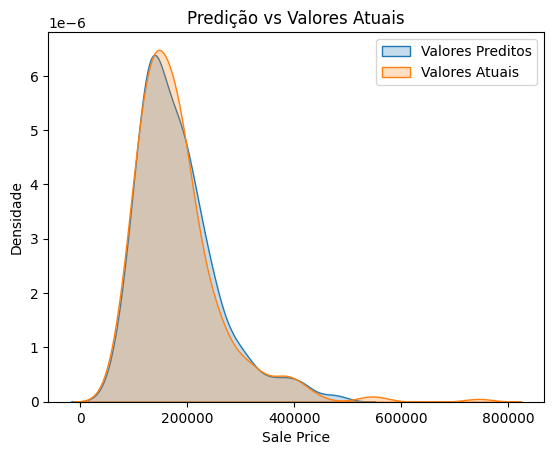

In [199]:
#Verificando a similaridade do melhor modelo com os dados de teste
sns.kdeplot(reg_xgb_predict, label='Valores Preditos', shade=True)
sns.kdeplot(y_test, label='Valores Atuais', shade=True)

plt.xlabel('Sale Price')
plt.ylabel('Densidade')
plt.title('Predição vs Valores Atuais')
plt.legend()

plt.show()

In [198]:
#criando o csv para a competição kaggle
predict = reg_gb.predict(x_test)

ids = x_test['Id']

output = pd.DataFrame({'Id': ids, 'SalePrice': predict})
output.to_csv('submission.csv', index=False)


In [195]:
output

,Id,SalePrice
529,530,234940.169403
491,492,149362.425893
459,460,109388.293590
279,280,202818.758892
655,656,94258.447486
...,...,...
326,327,273128.524492
440,441,461560.653617
1387,1388,156365.895865
1323,1324,91148.306040
